In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  # naive bayes
from sklearn.neighbors import KNeighborsClassifier #kNN
import numpy as np


#Carga de bases de datos.
df = pd.read_csv('Datos_finales_arreglados_con_undersampling_int.csv', encoding='utf-8')
df2 = pd.read_csv('Datos_finales_arreglados_sin_undersampling_int.csv', encoding='utf-8')



FileNotFoundError: [Errno 2] No such file or directory: 'Datos_finales_arreglados_con_undersampling_int.csv'

In [ ]:
print(df.shape)
print(df2.shape)

(100000, 17)
(90000, 17)


In [ ]:
def run_classifier(clf, X, y, num_tests=100):
    metrics = {'f1-score': [], 'precision': [], 'recall': []}

    for _ in range(num_tests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        metrics['y_pred'] = predictions
        metrics['f1-score'].append(f1_score(y_test, predictions))
        metrics['recall'].append(recall_score(y_test, predictions))
        metrics['precision'].append(precision_score(y_test, predictions))
    return metrics

y = df2['Severity'].to_numpy()
X = df2.drop('Severity', axis=1).to_numpy()

c0 = ("Base Dummy", DummyClassifier(strategy='stratified'))
c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=5))
c2 = ("Gaussian Naive Bayes", GaussianNB())
c3 = ("KNN", KNeighborsClassifier(n_neighbors=10))

classifiers = [c0, c1, c2, c3]

results = {}
for name, clf in classifiers:
    metrics = run_classifier(clf, X, y)   # hay que implementarla en el bloque anterior.
    results[name] = metrics
    print("----------------")
    print("Resultados para clasificador: ", name)
    print("Precision promedio:", np.array(metrics['precision']).mean())
    print("Recall promedio:", np.array(metrics['recall']).mean())
    print("F1-score promedio:", np.array(metrics['f1-score']).mean())
    print("----------------\n\n")

----------------
Resultados para clasificador:  Base Dummy
Precision promedio: 0.10428594481372577
Recall promedio: 0.10455579246624025
F1-score promedio: 0.10441087354672293
----------------


----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.6080097087378642
Recall promedio: 0.17803837953091686
F1-score promedio: 0.2754260582737768
----------------


----------------
Resultados para clasificador:  Gaussian Naive Bayes
Precision promedio: 0.2422960725075529
Recall promedio: 0.1425017768301351
F1-score promedio: 0.17945849183262463
----------------


----------------
Resultados para clasificador:  KNN
Precision promedio: 0.5824175824175825
Recall promedio: 0.05650319829424309
F1-score promedio: 0.10301263362487852
----------------




# Implementacion test 3

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  # naive bayes
from sklearn.neighbors import KNeighborsClassifier #kNN
import numpy as np


#Carga de bases de datos.
df = pd.read_csv('Datos_finales_arreglados_con_undersampling_int.csv', encoding='utf-8')
df2 = pd.read_csv('Datos_finales_arreglados_sin_undersampling_int.csv', encoding='utf-8')


In [ ]:
print(df.shape)
print(df2.shape)

(100000, 17)
(90000, 17)


In [ ]:
df.head()

,Severity,Start_Lng,Temperature.C.,Wind_Chill.C.,Humidity...,Pressure.pa.,Visibility.km.,Wind_Speed.kmh.,Precipitation.pa.,Bump,Crossing,Give_Way,Junction,Railway,Stop,Traffic_Signal,Sunrise_Sunset
0,1,-88.01407,15.000000,15.000000,75,9.335070,16.09340,11.265380,0.000000,0,0,0,0,0,0,0,0
1,1,-71.20423,16.111111,16.111111,83,9.483194,6.43736,32.186800,0.019321,0,0,0,1,0,0,0,0
2,1,-73.58044,11.666667,11.666667,96,9.537936,12.87472,22.530760,0.006440,0,0,0,0,0,0,0,1
3,1,-122.30528,13.888889,13.888889,51,9.692501,16.09340,20.921420,0.000000,0,0,0,0,0,0,0,0
4,1,-84.61284,0.000000,-6.222222,85,9.634539,16.09340,27.841582,0.000000,0,0,0,0,0,0,1,1


In [ ]:
atributos = ["Start_Lng", "Temperature.C.", "Wind_Chill.C.", "Humidity...", "Pressure.pa.",
             "Wind_Speed.kmh.", "Junction", "Traffic_Signal", "Sunrise_Sunset"]

def run_classifier1(clf, X, y, Xt, yt, num_tests=100):
    metrics = {'f1-score': [], 'precision': [], 'recall': []}

    for _ in range(num_tests):
        X_train, X_test, y_train, y_test = X, Xt, y, yt

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        metrics['y_pred'] = predictions
        metrics['f1-score'].append(f1_score(y_test, predictions))
        metrics['recall'].append(recall_score(y_test, predictions))
        metrics['precision'].append(precision_score(y_test, predictions))
    return metrics

c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=5))
c3 = ("KNN", KNeighborsClassifier(n_neighbors=10))
classifiers = [c1, c3]

y = df['Severity'].to_numpy()
X = df.drop('Severity', axis=1)
yt = df2['Severity'].to_numpy()
Xt = df2.drop('Severity', axis=1)

for i in range(0, len(atributos)):
    if(atributos[4] != atributos[i]):
        print(i, [atributos[4], atributos[i]])
        X1 = X[[atributos[4], atributos[i]]].to_numpy()
        Xt1 = Xt[[atributos[4], atributos[i]]].to_numpy()
        results = {}
        for name, clf in classifiers:
            metrics = run_classifier1(clf, X1, y, Xt1, yt)   # hay que implementarla en el bloque anterior.
            results[name] = metrics
            print("----------------")
            print("Resultados para clasificador: ", name)
            print("Precision promedio:", np.array(metrics['precision']).mean())
            print("Recall promedio:", np.array(metrics['recall']).mean())
            print("F1-score promedio:", np.array(metrics['f1-score']).mean())
            print("----------------\n\n")

0 ['Pressure.pa.', 'Start_Lng']
----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.19498984427894375
Recall promedio: 0.7374373199615915
F1-score promedio: 0.3084268534838581
----------------


----------------
Resultados para clasificador:  KNN
Precision promedio: 0.24366124757723195
Recall promedio: 0.6572068707991037
F1-score promedio: 0.35551451491891284
----------------


1 ['Pressure.pa.', 'Temperature.C.']
----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.14461980624860635
Recall promedio: 0.622746185852982
F1-score promedio: 0.23472875698717163
----------------


----------------
Resultados para clasificador:  KNN
Precision promedio: 0.12570143852017032
Recall promedio: 0.7337031900138696
F1-score promedio: 0.21463125370618882
----------------


2 ['Pressure.pa.', 'Wind_Chill.C.']
----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.14698979591836733
Recall promedio: 0.614744478822

# Implementacion test 1

In [65]:
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

random_state = 20

#Carga de bases de datos.
df = pd.read_csv('Datos_finales_arreglados_con_undersampling_int.csv', encoding='utf-8')
df2 = pd.read_csv('Datos_finales_arreglados_sin_undersampling_int.csv', encoding='utf-8')


In [66]:
print(df.shape)
print(df2.shape)

(100000, 17)
(90000, 17)


In [67]:
df.head()

,Severity,Start_Lng,Temperature.C.,Wind_Chill.C.,Humidity...,Pressure.pa.,Visibility.km.,Wind_Speed.kmh.,Precipitation.pa.,Bump,Crossing,Give_Way,Junction,Railway,Stop,Traffic_Signal,Sunrise_Sunset
0,1,-88.01407,15.000000,15.000000,75,9.335070,16.09340,11.265380,0.000000,0,0,0,0,0,0,0,0
1,1,-71.20423,16.111111,16.111111,83,9.483194,6.43736,32.186800,0.019321,0,0,0,1,0,0,0,0
2,1,-73.58044,11.666667,11.666667,96,9.537936,12.87472,22.530760,0.006440,0,0,0,0,0,0,0,1
3,1,-122.30528,13.888889,13.888889,51,9.692501,16.09340,20.921420,0.000000,0,0,0,0,0,0,0,0
4,1,-84.61284,0.000000,-6.222222,85,9.634539,16.09340,27.841582,0.000000,0,0,0,0,0,0,1,1


In [68]:
atributos = ["Start_Lng", "Temperature.C.", "Wind_Chill.C.", "Humidity...", "Pressure.pa.",
             "Wind_Speed.kmh.", "Junction", "Traffic_Signal", "Sunrise_Sunset"]

y = df['Severity'].to_numpy()
X = df.drop('Severity', axis=1)
yt = df2['Severity'].to_numpy()
Xt = df2.drop('Severity', axis=1)


X1 = X[atributos].to_numpy()
Xt1 = Xt[atributos].to_numpy()

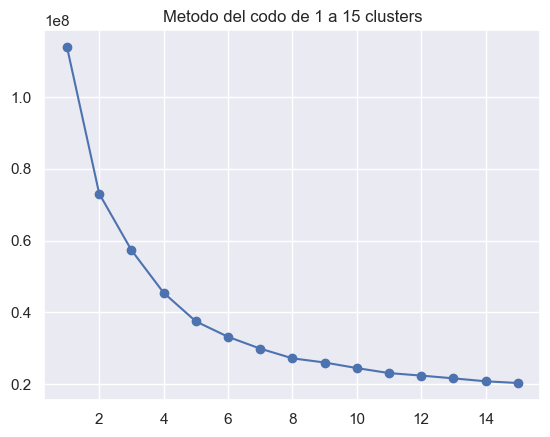

In [69]:
sse = []

clusters = list(range(1, 16))
for k in clusters:
    kmeans = KMeans(n_clusters=k,n_init='auto').fit(X1)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 15 clusters")
plt.grid(True)
plt.show()

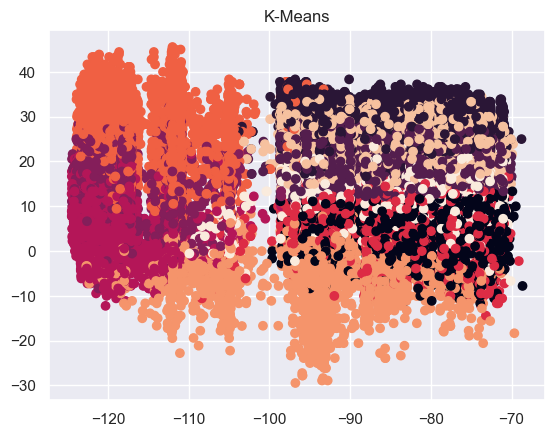

In [70]:
kmeans = KMeans(n_clusters=10, random_state=20,n_init='auto').fit(X1)
y_pred = kmeans.predict(X1)

plt.scatter(X1[:, 0], X1[:, 1], c=kmeans.labels_)
plt.title("K-Means")
plt.show()

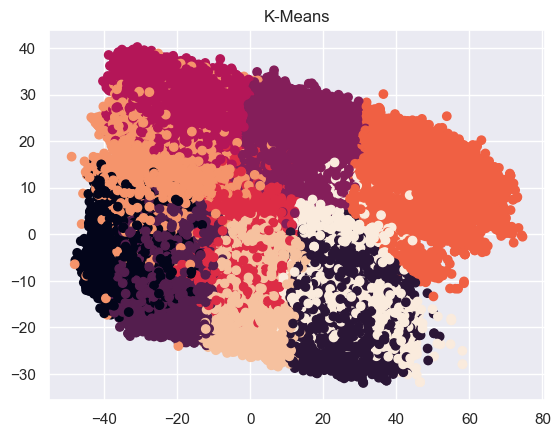

In [71]:
new_X = PCA(n_components=2, random_state=0).fit_transform(X1)
plt.scatter(new_X[:, 0], new_X[:, 1], c=kmeans.labels_)
plt.title("K-Means")
plt.show()

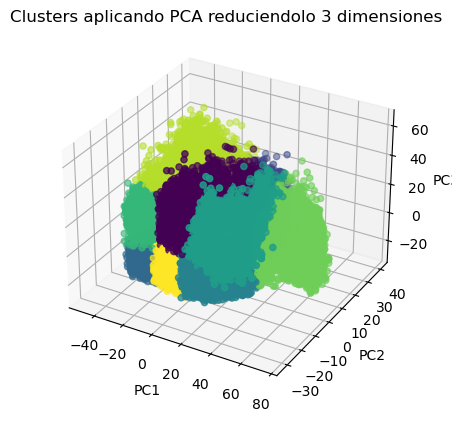

In [ ]:
# Aplicar PCA
X = df[atributos]
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X1)

# Aplicar K-Means
kmeans = KMeans(n_clusters=10, random_state=42, n_init='auto')
kmeans.fit(X_pca)
labels = kmeans.labels_

# Graficar los clusters en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Clusters aplicando PCA reduciendolo 3 dimensiones')
plt.show()

# Nueva Pregunta 1

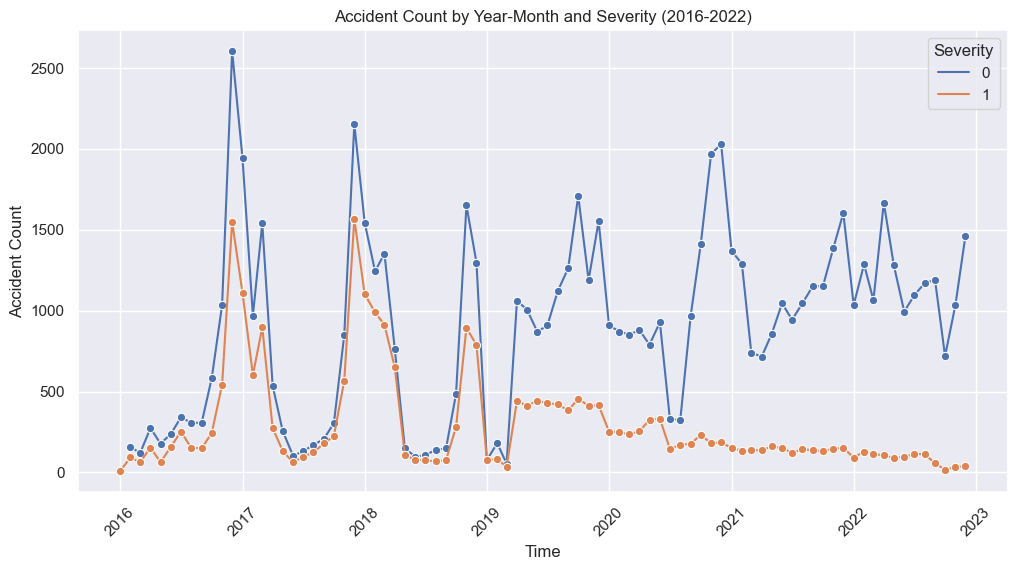

,Severity,Time,Start_Lng,Temperature.C.,Wind_Chill.C.,Humidity...,Pressure.pa.,Visibility.km.,Wind_Speed.kmh.,Precipitation.pa.,Bump,Crossing,Give_Way,Junction,Railway,Stop,Traffic_Signal,Sunrise_Sunset
0,1,2016-02-01,-82.925194,3.277778,1.944444,97.0,100338.7357,11.26538,5.632690,101.5917,0,0,0,1,0,0,0,0
1,1,2016-02-01,-82.925194,3.000000,1.000000,100.0,100304.8718,4.82802,7.402964,67.7278,0,0,0,1,0,0,0,0
2,1,2016-02-01,-82.830910,3.000000,1.000000,100.0,100304.8718,4.82802,7.402964,67.7278,0,0,0,1,0,0,0,0
3,0,2016-02-01,-82.913521,3.000000,1.000000,100.0,100304.8718,4.82802,7.402964,67.7278,0,0,0,1,0,0,0,0
4,0,2016-02-01,-82.882332,1.000000,-1.333333,100.0,100304.8718,3.21868,7.402964,33.8639,0,0,0,1,0,0,0,0


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

headers = ["Severity", "Time", "Start_Lng", "Temperature.C.", "Wind_Chill.C.", "Humidity...", "Pressure.pa.",
           "Visibility.km.", "Wind_Speed.kmh.", "Precipitation.pa.", "Bump", "Crossing", "Give_Way", "Junction",
           "Railway", "Stop", "Traffic_Signal", "Sunrise_Sunset"]

df = pd.read_csv("muestraAnos.csv", encoding='utf-8', header=None, names=headers, parse_dates=['Time'])

start_date = pd.to_datetime('2016-01')
end_date = pd.to_datetime('2022-12')
filtered_data = df[(df['Time'] >= start_date) & (df['Time'] <= end_date)]

grouped_data = filtered_data.groupby(['Time', 'Severity']).size().reset_index(name='Accident_Count')

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Time', y='Accident_Count', hue='Severity', marker='o')
plt.xlabel('Time')
plt.ylabel('Accident Count')
plt.title('Accident Count by Year-Month and Severity (2016-2022)')
plt.xticks(rotation=45)
plt.show()

df.head()

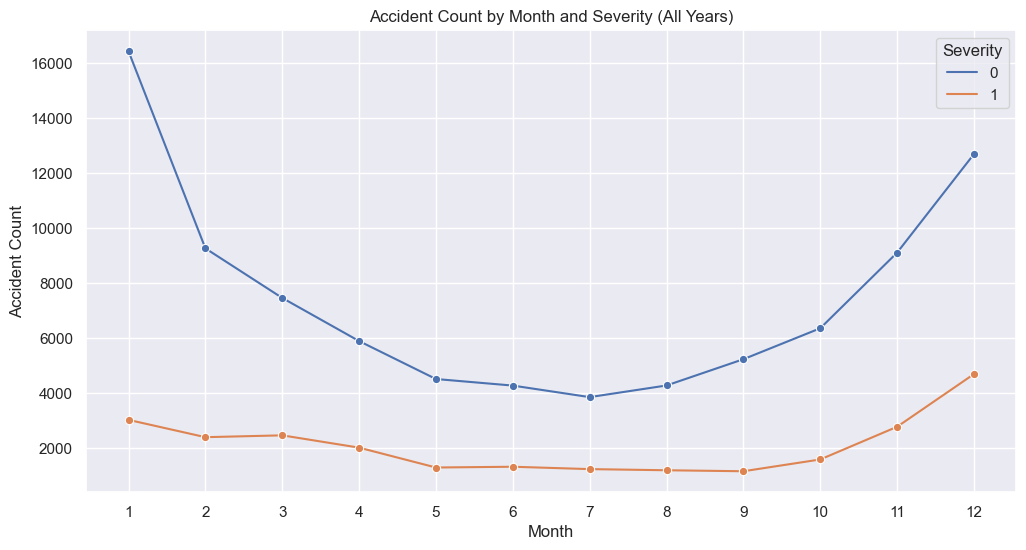

,Severity,Time,Start_Lng,Temperature.C.,Wind_Chill.C.,Humidity...,Pressure.pa.,Visibility.km.,Wind_Speed.kmh.,Precipitation.pa.,Bump,Crossing,Give_Way,Junction,Railway,Stop,Traffic_Signal,Sunrise_Sunset,Month
0,1,2016-02-01,-82.925194,3.277778,1.944444,97.0,100338.7357,11.26538,5.632690,101.5917,0,0,0,1,0,0,0,0,2
1,1,2016-02-01,-82.925194,3.000000,1.000000,100.0,100304.8718,4.82802,7.402964,67.7278,0,0,0,1,0,0,0,0,2
2,1,2016-02-01,-82.830910,3.000000,1.000000,100.0,100304.8718,4.82802,7.402964,67.7278,0,0,0,1,0,0,0,0,2
3,0,2016-02-01,-82.913521,3.000000,1.000000,100.0,100304.8718,4.82802,7.402964,67.7278,0,0,0,1,0,0,0,0,2
4,0,2016-02-01,-82.882332,1.000000,-1.333333,100.0,100304.8718,3.21868,7.402964,33.8639,0,0,0,1,0,0,0,0,2


In [16]:
df['Month'] = df['Time'].dt.month

grouped_data = df.groupby(['Month', 'Severity']).size().reset_index(name='Accident_Count')

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Month', y='Accident_Count', hue='Severity', marker='o')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.title('Accident Count by Month and Severity (All Years)')
plt.xticks(range(1, 13))
plt.show()

df.head()

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [49]:
atributos = ["Start_Lng", "Temperature.C.", "Wind_Chill.C.", "Humidity...", "Pressure.pa.",
             "Wind_Speed.kmh.", "Junction", "Traffic_Signal", "Sunrise_Sunset", "Month"]


from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
import numpy as np

X = df[atributos].to_numpy()
y = df['Severity'].to_numpy()

def run_classifier(clf, X, y, num_tests=10):
    metrics = {'f1-score': [], 'precision': [], 'recall': []}

    for _ in range(num_tests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        ### INICIO COMPLETAR ACÁ

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        #### TIP: en base a los set de entrenamiento, genere la variable 'predictions'
        #### que contiene las predicciones del modelo



        ### FIN COMPLETAR ACÁ

        metrics['y_pred'] = predictions
        metrics['f1-score'].append(f1_score(y_test, predictions))
        metrics['recall'].append(recall_score(y_test, predictions))
        metrics['precision'].append(precision_score(y_test, predictions))
    return metrics


In [50]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  # naive bayes
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.svm import SVC  # support vector machine


c0 = ("Base Dummy", DummyClassifier(strategy='stratified'))
c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=5))
c2 = ("Gaussian Naive Bayes", GaussianNB())
c3 = ("KNN", KNeighborsClassifier(n_neighbors=10))
c4 = ("Support Vector Machines", SVC())

classifiers = [c1, c3]

results = {}
for name, clf in classifiers:
    metrics = run_classifier(clf, X, y)   # hay que implementarla en el bloque anterior.
    results[name] = metrics
    print("----------------")
    print("Resultados para clasificador: ", name)
    print("Precision promedio:", np.array(metrics['precision']).mean())
    print("Recall promedio:", np.array(metrics['recall']).mean())
    print("F1-score promedio:", np.array(metrics['f1-score']).mean())
    print("----------------\n\n")

D:\Users\kauer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.3851729185833309
Recall promedio: 0.0022156409781539724
F1-score promedio: 0.004389897740295831
----------------


----------------
Resultados para clasificador:  KNN
Precision promedio: 0.43203761422804465
Recall promedio: 0.08881129396049266
F1-score promedio: 0.1473065452407156
----------------




In [ ]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.7805417357656164
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     26828
           1       1.00      0.00      0.00      7543

    accuracy                           0.78     34371
   macro avg       0.89      0.50      0.44     34371
weighted avg       0.83      0.78      0.68     34371

